# LearnX Sales Forecasting
## Submittied By: Simranjeet Singh

## Import required Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

from datetime import date, timedelta

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

## Importing the data set

In [5]:
df_train=pd.read_csv('train-1.csv')
df_test=pd.read_csv('test_TyVG1cP.csv')

In [6]:
df_train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


## Basic data checks

In [7]:
df_train.shape,   df_test.shape

((512087, 11), (36000, 9))

In [8]:
df_train.columns, df_test.columns

(Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
        'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
        'Competition_Metric', 'Sales'],
       dtype='object'),
 Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
        'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
        'Competition_Metric'],
       dtype='object'))

__Observation__: 
- User traffic is not there in test data set
- And Sales is not there as well. But, this is understandable because Sales is our predicition variable

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [10]:
df_train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


## EDA

#### Checking the Unique Values

In [11]:
# checking unique key
df_train.nunique()==df_train.shape[0]

ID                     True
Day_No                False
Course_ID             False
Course_Domain         False
Course_Type           False
Short_Promotion       False
Public_Holiday        False
Long_Promotion        False
User_Traffic          False
Competition_Metric    False
Sales                 False
dtype: bool

In [12]:
# dropping unique key
df_train.drop(['ID'],axis=1,inplace=True)
df_train.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,1,Development,Course,0,0,1,6804,0.007,41


In [13]:
df_train.nunique()

Day_No                 882
Course_ID              600
Course_Domain            4
Course_Type              3
Short_Promotion          2
Public_Holiday           2
Long_Promotion           2
User_Traffic          3475
Competition_Metric     196
Sales                  544
dtype: int64

#### Checking the NULL values %

In [14]:
df_train.isna().sum()/df_train.shape[0]*100

Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          0.000000
Competition_Metric    0.344473
Sales                 0.000000
dtype: float64

#### Analysing Competition_Metric feature

In [15]:
df_train[(df_train.Competition_Metric.isnull())]

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
149014,1,176,Software Marketing,Course,0,1,0,12180,NaN,120
149015,2,176,Software Marketing,Course,0,0,0,18396,NaN,138
149016,3,176,Software Marketing,Course,0,0,0,18291,NaN,132
149017,4,176,Software Marketing,Course,0,0,0,19320,NaN,139
149018,5,176,Software Marketing,Course,0,0,0,11592,NaN,95
149019,6,176,Software Marketing,Course,0,0,0,16548,NaN,117
149020,7,176,Software Marketing,Course,1,0,0,27636,NaN,237
149021,8,176,Software Marketing,Course,1,0,0,19278,NaN,167
149022,9,176,Software Marketing,Course,1,0,0,20517,NaN,166
149023,10,176,Software Marketing,Course,1,0,0,18711,NaN,153


In [16]:
df_train.Competition_Metric.value_counts()

0.001    20800
0.003    18852
0.002    16390
0.004    15838
0.009    11980
0.007    10400
0.000     8819
0.006     8452
0.021     8084
0.030     7754
0.014     7754
0.005     7754
0.035     7056
0.044     6872
0.018     6688
0.015     6688
0.016     6504
0.013     6504
0.008     6320
0.022     6174
0.051     5990
0.027     5990
0.028     5990
0.024     5292
0.032     5108
0.023     5108
0.011     5108
0.012     5108
0.036     4740
0.082     4410
0.047     4410
0.041     4410
0.042     4410
0.091     4410
0.059     4226
0.020     4226
0.019     4226
0.029     4042
0.010     4042
0.038     3528
0.037     3528
0.026     3528
0.025     3528
0.045     3528
0.033     3344
0.067     3344
0.017     3344
0.043     3344
0.064     3344
0.070     3160
0.076     2646
0.084     2646
0.068     2646
0.109     2646
0.056     2646
0.101     2646
0.055     2646
0.261     2462
0.106     2462
0.173     2462
0.129     2462
0.039     2462
0.172     2462
0.031     2462
0.228     2462
0.141     2462
0.069     

In [17]:
df_train.Competition_Metric.describe()

count    510323.000000
mean          0.073345
std           0.100115
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

<AxesSubplot:xlabel='Competition_Metric'>

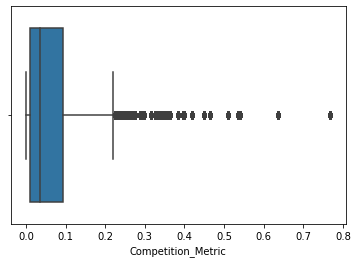

In [18]:
sns.boxplot(data=df_train, x="Competition_Metric")

In [19]:
# Computing the missing value with median
df_train.Competition_Metric.fillna(value=df_train.Competition_Metric.median(),inplace=True)


In [20]:
df_train.Competition_Metric.isnull().sum()

0

#### Checking the value count in each feature

In [21]:
# for i in df_train.columns:
#     print('Column Name: ',i)
#     print(df_train[i].value_counts())
#     print()

#### Numerical features

In [22]:
num_features=df_train.select_dtypes(exclude ='object').columns
num_features

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

#### Categorical features

In [23]:
cat_features=df_train.select_dtypes(include ='object').columns
cat_features

Index(['Course_Domain', 'Course_Type'], dtype='object')

#### Checking the Boxplot for each numerical feature

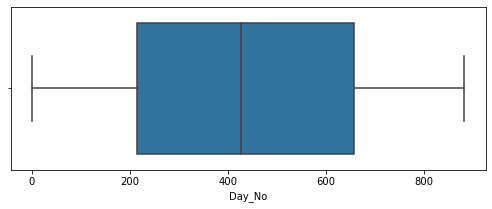

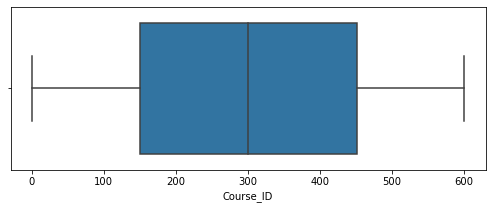

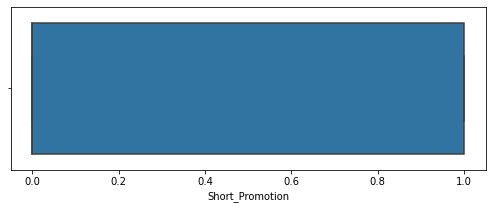

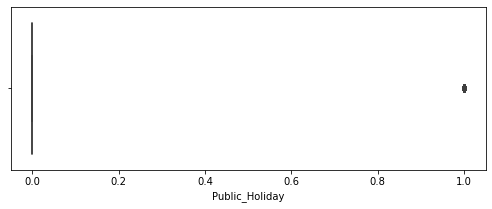

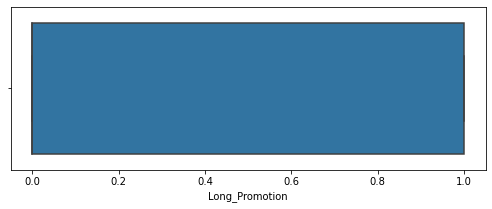

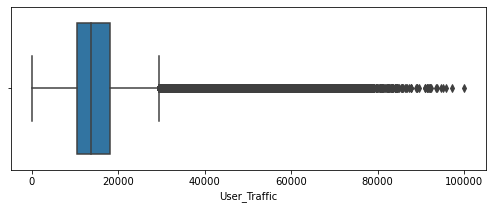

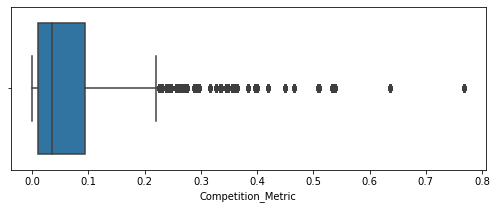

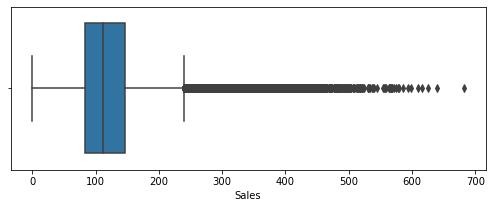

In [24]:
for i in range(len(num_features)):
    plt.figure(figsize = (80,3))
    plt.subplot(1,len(num_features),i+1)
    sns.boxplot(data=df_train,x=num_features[i])
    plt.show()

#### Checking the Countplot for each categorical feature

/Users/simranjeetsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


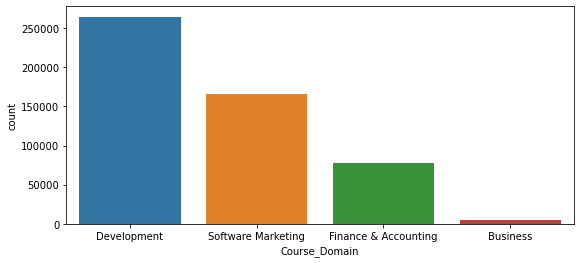

/Users/simranjeetsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


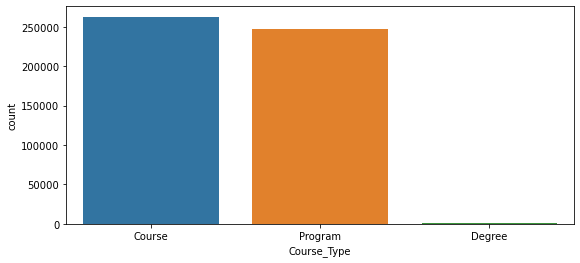

In [25]:
for i in range(len(cat_features)):
    plt.figure(figsize = (20,4))
    plt.subplot(1,2,i+1)
    #sns.boxplot(data=df_train,x=num_features[i])
    sns.countplot(df_train[cat_features[i]])
    plt.show()


#### Checking the Heatmap

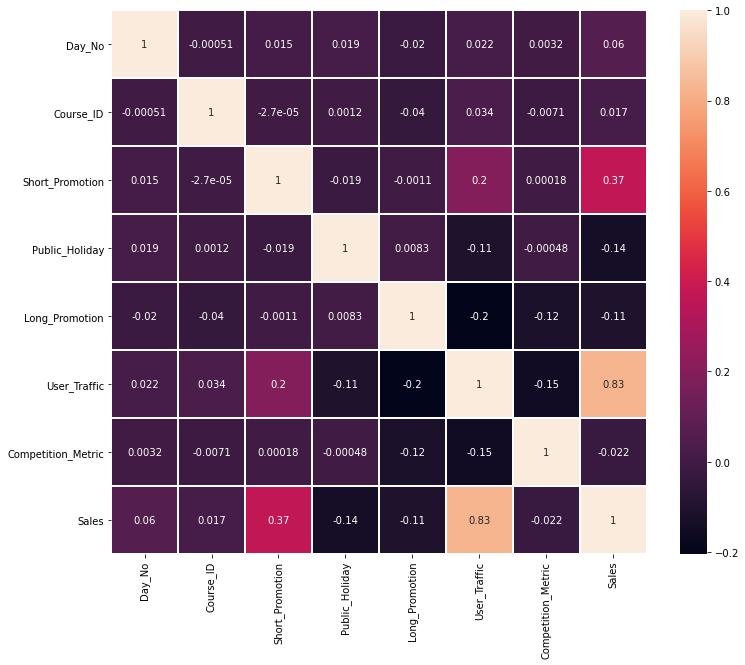

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(df_train[num_features].corr(),linewidths=1,annot=True)
plt.show()

#### Checking the target faeture (Sales)


In [27]:
df_train.Sales.value_counts()

95     8917
100    8901
114    8024
80     7866
120    7413
76     7202
133    6213
140    5562
99     4565
97     4559
96     4558
92     4501
90     4492
101    4489
94     4475
86     4442
104    4438
106    4420
88     4415
102    4386
152    4381
108    4373
93     4372
98     4345
91     4332
110    4331
60     4325
103    4301
84     4286
107    4280
82     4269
87     4207
112    4174
89     4172
85     4166
105    4152
83     4113
109    4054
111    4053
81     4046
115    3996
77     3940
79     3916
117    3910
113    3863
78     3858
116    3832
118    3817
119    3812
160    3672
122    3668
57     3596
124    3569
121    3560
126    3536
74     3532
123    3513
75     3498
127    3433
72     3371
125    3370
128    3348
130    3330
73     3297
71     3242
129    3220
70     3178
135    3149
132    3108
131    3066
68     3065
69     3009
171    2968
136    2953
134    2910
66     2907
139    2882
137    2881
138    2832
67     2811
64     2768
142    2672
65     2639
141 

/Users/simranjeetsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


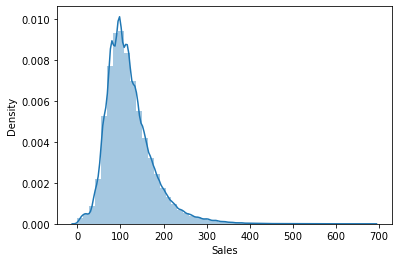

In [28]:
sns.distplot(df_train.Sales)
plt.show()

In [29]:
print("Skew (Sales)= ", df_train.Sales.skew())
print("Kurtosis (Sales)= ", df_train.Sales.kurt())

Skew (Sales)=  1.374769816079381
Kurtosis (Sales)=  3.6095060518605546


__Note__: If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails)

#### Since User_Traffic is not there is test data set. So, I am dropping it.

In [30]:
df_train.drop('User_Traffic',axis=1,inplace=True)
df_train.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
0,1,1,Development,Course,0,1,1,0.007,81
1,2,1,Development,Course,0,0,1,0.007,79
2,3,1,Development,Course,0,0,1,0.007,75
3,4,1,Development,Course,0,0,1,0.007,80
4,5,1,Development,Course,0,0,1,0.007,41


In [31]:
df_train.shape,df_test.shape

((512087, 9), (36000, 9))

#### Analysing Day_No

In [32]:
df_train.tail()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
512082,878,600,Software Marketing,Program,0,0,1,0.07,114
512083,879,600,Software Marketing,Program,0,0,1,0.07,145
512084,880,600,Software Marketing,Program,0,0,1,0.07,167
512085,881,600,Software Marketing,Program,0,0,1,0.07,107
512086,882,600,Software Marketing,Program,1,0,1,0.07,152


In [33]:
df_test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


__Converting the Day_No to Day, Month and Year. Assuming Day_No starts from 1st jan, 2020.__

In [34]:
Start_Date = date(2019,12,31)
df_train['Date'] = df_train['Day_No'].apply(lambda x: Start_Date + timedelta(x)) 

In [35]:
df_train.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Date
0,1,1,Development,Course,0,1,1,0.007,81,2020-01-01
1,2,1,Development,Course,0,0,1,0.007,79,2020-01-02
2,3,1,Development,Course,0,0,1,0.007,75,2020-01-03
3,4,1,Development,Course,0,0,1,0.007,80,2020-01-04
4,5,1,Development,Course,0,0,1,0.007,41,2020-01-05


In [36]:
df_train['Day'] = df_train['Date'].apply(lambda x: x.day)
df_train['Month'] = df_train['Date'].apply(lambda x: x.month)
df_train['Year'] = df_train['Date'].apply(lambda x: x.year)
df_train['Weekday'] = df_train['Date'].apply(lambda x: x.weekday())
df_train.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Date,Day,Month,Year,Weekday
0,1,1,Development,Course,0,1,1,0.007,81,2020-01-01,1,1,2020,2
1,2,1,Development,Course,0,0,1,0.007,79,2020-01-02,2,1,2020,3
2,3,1,Development,Course,0,0,1,0.007,75,2020-01-03,3,1,2020,4
3,4,1,Development,Course,0,0,1,0.007,80,2020-01-04,4,1,2020,5
4,5,1,Development,Course,0,0,1,0.007,41,2020-01-05,5,1,2020,6


In [37]:
# Dropping Day_No, Date, Day
df_train.drop(['Day_No','Date','Day'],axis=1,inplace=True)
df_train.head()

,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Month,Year,Weekday
0,1,Development,Course,0,1,1,0.007,81,1,2020,2
1,1,Development,Course,0,0,1,0.007,79,1,2020,3
2,1,Development,Course,0,0,1,0.007,75,1,2020,4
3,1,Development,Course,0,0,1,0.007,80,1,2020,5
4,1,Development,Course,0,0,1,0.007,41,1,2020,6


In [38]:
# Doing same for test data set

Start_Date = date(2019,12,31)
df_test['Date'] = df_test['Day_No'].apply(lambda x: Start_Date + timedelta(x)) 

df_test['Day'] = df_test['Date'].apply(lambda x: x.day)
df_test['Month'] = df_test['Date'].apply(lambda x: x.month)
df_test['Year'] = df_test['Date'].apply(lambda x: x.year)
df_test['Weekday'] = df_test['Date'].apply(lambda x: x.weekday())

# Dropping Day_No, Date, Day
df_test.drop(['Day_No','Date','Day'],axis=1,inplace=True)
df_test.head()

,ID,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Month,Year,Weekday
0,883,1,Development,Course,1,0,1,0.007,6,2022,2
1,884,1,Development,Course,1,0,1,0.007,6,2022,3
2,885,1,Development,Course,1,0,1,0.007,6,2022,4
3,886,1,Development,Course,1,0,1,0.007,6,2022,5
4,887,1,Development,Course,0,0,1,0.007,6,2022,6


In [39]:
df_train.shape, df_test.shape

((512087, 11), (36000, 11))

#### Dummy Value creation

In [40]:
df_train = pd.get_dummies(df_train, columns = cat_features)
df_test = pd.get_dummies(df_test, columns = cat_features)

In [41]:
df_train.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Month,Year,Weekday,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,1,0,1,1,0.007,81,1,2020,2,0,1,0,0,1,0,0
1,1,0,0,1,0.007,79,1,2020,3,0,1,0,0,1,0,0
2,1,0,0,1,0.007,75,1,2020,4,0,1,0,0,1,0,0
3,1,0,0,1,0.007,80,1,2020,5,0,1,0,0,1,0,0
4,1,0,0,1,0.007,41,1,2020,6,0,1,0,0,1,0,0


## Train Test Split

In [42]:
y = df_train.Sales
x = df_train.drop(['Sales'], axis=1)
x.shape, y.shape

((512087, 15), (512087,))

In [43]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 100, test_size = 0.20)

In [44]:
#rmsle
def rmsle1000(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000

## Model 1: Random Forest

In [125]:
rf= RandomForestRegressor(n_estimators = 20, random_state = 10) 
rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=20, random_state=10)

In [126]:
y_pred = rf.predict(test_x)

In [127]:
rmsle1000(test_y, y_pred)

227.02636617140934

## Model 2.0: XGBoost

In [45]:
xgb = XGBRegressor(n_estimators= 500)
xgb.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred = xgb.predict(test_x)

In [47]:
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


196.26039729457423

In [48]:
xgb.score(train_x,train_y)

0.8870843958246557

In [49]:
xgb.score(test_x,test_y)

0.8743149186139705

## Model 2.1: XGBoost

In [50]:
xgb1 = XGBRegressor(n_estimators= 700)
xgb1.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
xgb1.score(train_x,train_y), xgb1.score(test_x,test_y)

(0.8916507170471001, 0.8757075371295744)

## Model 2.2: XGBoost

In [53]:
xgb2 = XGBRegressor(n_estimators= 700,max_depth=8)
xgb2.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb2.score(train_x,train_y), xgb2.score(test_x,test_y)

(0.9068931809132376, 0.8614053789808407)

In [59]:
y_pred = xgb2.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


208.27270163692648

## Model 2.3: XGBoost

In [57]:
xgb3 = XGBRegressor(n_estimators= 700,max_depth=10)
xgb3.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xgb3.score(train_x,train_y), xgb3.score(test_x,test_y)

(0.9179165482409789, 0.8269608656599468)

In [60]:
y_pred = xgb3.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


228.6925738902314

## Model 2.4: XGBoost

In [61]:
xgb4 = XGBRegressor(n_estimators= 500,max_depth=10)
xgb4.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb4.score(train_x,train_y), xgb4.score(test_x,test_y)

(0.915736830325166, 0.8362893562661797)

In [64]:
y_pred = xgb4.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


223.00139359875757

## Model 2.5: XGBoost

In [65]:
xgb5 = XGBRegressor(n_estimators= 700,max_depth=7)
xgb5.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb5.score(train_x,train_y), xgb5.score(test_x,test_y)

(0.9000434902996098, 0.8714279584543286)

In [67]:
y_pred = xgb5.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


200.34160264973443

## Model 2.6: XGBoost

In [68]:
xgb6 = XGBRegressor(n_estimators= 800,max_depth=7)
xgb6.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
xgb6.score(train_x,train_y), xgb6.score(test_x,test_y)

(0.9012142110876978, 0.8703544266679859)

In [70]:
y_pred = xgb6.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


202.672280306271

## Model 2.7: XGBoost

In [71]:
xgb7 = XGBRegressor(n_estimators= 250,max_depth=7)
xgb7.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xgb7.score(train_x,train_y), xgb7.score(test_x,test_y)

(0.8867773692462322, 0.8717676039960842)

In [73]:
y_pred = xgb7.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


200.2089322641855

## Model 2.8: XGBoost

In [74]:
xgb8 = XGBRegressor(n_estimators= 500,max_depth=5)
xgb8.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb8.score(train_x,train_y), xgb8.score(test_x,test_y)

(0.8724923345545152, 0.8652004998169192)

In [76]:
y_pred = xgb8.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


200.3977681713536

## Model 2.9: XGBoost

In [77]:
xgb9 = XGBRegressor(n_estimators= 800,max_depth=7,reg_alpha=100)
xgb9.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgb9.score(train_x,train_y), xgb9.score(test_x,test_y)

(0.897612951908684, 0.8765262309726345)

In [79]:
y_pred = xgb9.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


198.88128837375854

## Model 2.10: XGBoost

In [80]:
xgb10 = XGBRegressor(n_estimators= 600,max_depth=5)
xgb10.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xgb10.score(train_x,train_y), xgb10.score(test_x,test_y)

(0.8768882577595134, 0.8689952973461387)

In [82]:
y_pred = xgb10.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


203.56898499761624

## Model 2.11: XGBoost

In [83]:
xgb11 = XGBRegressor(n_estimators= 800,max_depth=7,reg_alpha=150)
xgb11.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=150, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
xgb11.score(train_x,train_y), xgb11.score(test_x,test_y)

(0.8963416488966737, 0.8770188566610654)

In [85]:
y_pred = xgb11.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


196.7784553149124

## Model 2.12: XGBoost

In [86]:
xgb12 = XGBRegressor(n_estimators= 750,max_depth=7,reg_alpha=150)
xgb12.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=150, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
xgb12.score(train_x,train_y), xgb12.score(test_x,test_y)

(0.8958622747252596, 0.8771624957967323)

In [88]:
y_pred = xgb12.predict(test_x)
rmsle1000(test_y, y_pred)

<ipython-input-44-95c0da9ee5ea>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


196.64039000784558

In [121]:
xgb12.feature_importances_

array([0.05947444, 0.13602488, 0.02787291, 0.08177529, 0.0591605 ,
       0.0134037 , 0.00810478, 0.02212803, 0.36434102, 0.09021931,
       0.0297807 , 0.02595462, 0.06810226, 0.00133159, 0.01232585],
      dtype=float32)

In [124]:
train_x.columns

Index(['Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric', 'Month', 'Year', 'Weekday',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

## Submission Process

In [89]:
id=df_test['ID']

In [90]:
df_test.drop('ID',axis=1,inplace=True)

In [130]:
xgb_preds_test = xgb12.predict(df_test)

In [131]:
submission = pd.DataFrame()
submission['ID'] = id
submission['Sales'] = xgb_preds_test
submission.to_csv('submission_final.csv', index=False)
submission.head()

,ID,Sales
0,883,116.685143
1,884,124.428436
2,885,105.139397
3,886,91.597130
4,887,53.181946


# Thank You